# ZADANIE 1

Wczytanie bazy danych.

In [41]:
using CSV
using DataFrames
using Plots
using Printf

In [42]:
data = DataFrame(CSV.File("flu.csv"; delim=',', header=3))

,HEMISPHERELONG,CONTINENT,WHOREGION,FLULONG,Country
,String,String,String,String,String
1,Northern hemishere,Europe,EUR,Eastern Europe,Belarus
2,Northern hemishere,Europe,EUR,South West Europe,Switzerland
3,Northern hemishere,Europe,EUR,Eastern Europe,Bulgaria
4,Northern hemishere,Europe,EUR,South West Europe,Bosnia and Herzegovina
5,Northern hemishere,Europe,EUR,Northern Europe,Ireland
6,Northern hemishere,Europe,EUR,South West Europe,Italy
7,Northern hemishere,Europe,EUR,Eastern Europe,Russian Federation
8,Northern hemishere,Europe,EUR,South West Europe,Serbia
9,Northern hemishere,Europe,EUR,Eastern Europe,Romania


Przygotowanie i obróbka istotnych dla zadania danych; grupa krajów sąsiednich.

In [43]:
country_list = ["Poland", "Ukraine", "Czechia", "Germany", "Austria", "Belarus",
    "Lithuania", "Latvia", "Estonia", "Slovakia", "Russian Federation"]
plot_d_container = []
months = ["styczeń", "luty", "marzec", "kwiecień", "maj",
        "czerwiec", "lipiec", "sierpień", "wrzesień", "październik", "listopad", "grudzień"]

for country in country_list
    cntry_data = data[.&(data[!, "Country"] .== country, data[!, "Year"] .== 2020) , :]
    cntry_data_sorted = sort!(cntry_data, ["Week"])
    cntry_data_sorted.ILI_POP_RATE[ismissing.(cntry_data_sorted.ILI_POP_RATE)] .= 0
    extr_data_vals = cntry_data_sorted[!, "ILI_POP_RATE"]
    extr_data_ind = cntry_data_sorted[!, "Week"]
    push!(plot_d_container, (extr_data_ind, extr_data_vals) )
end



Wykresy dla poszczególnych państw.

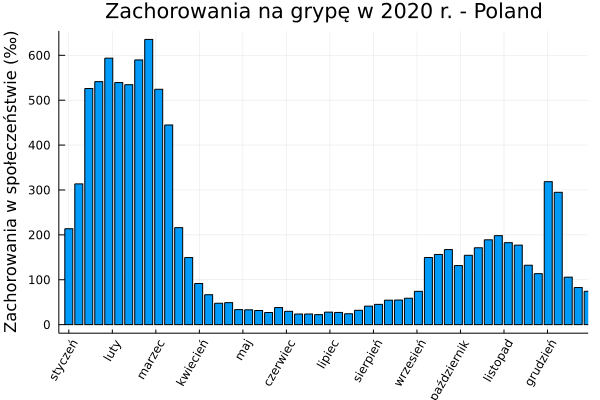

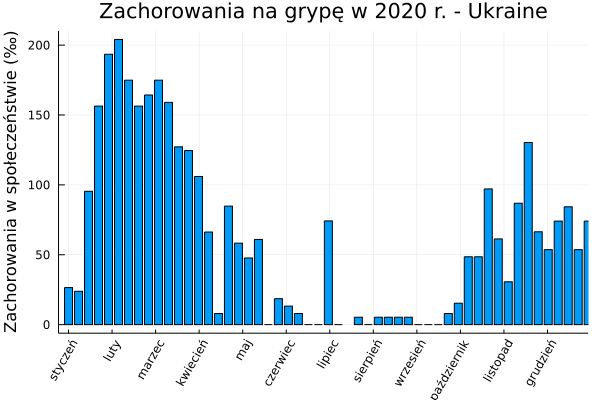

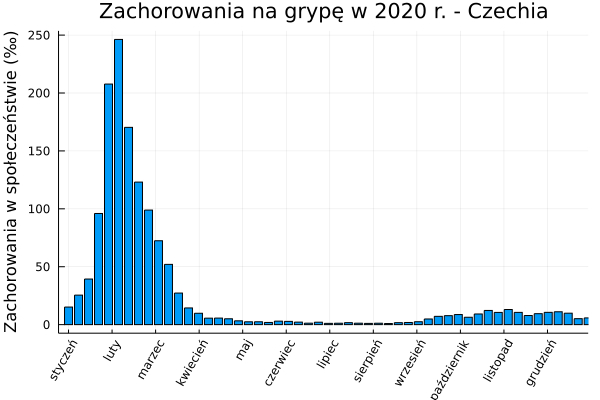

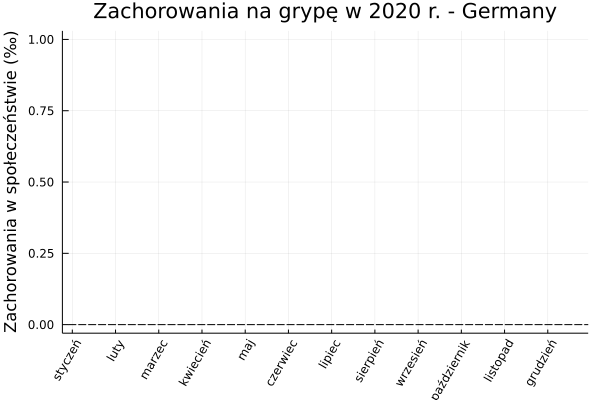

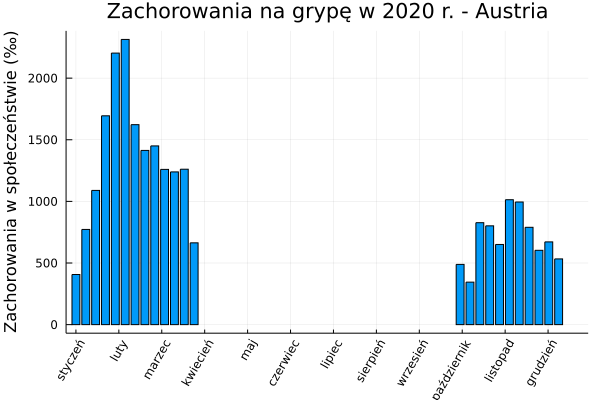

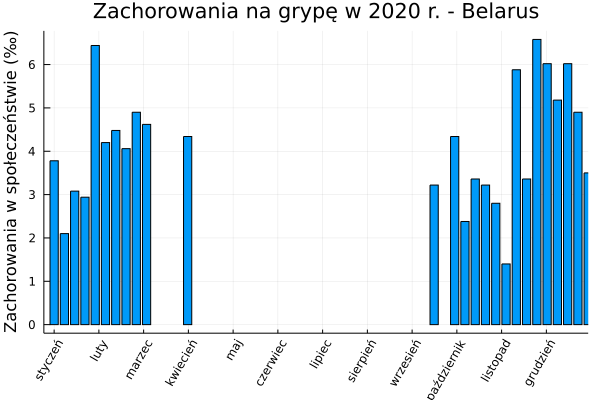

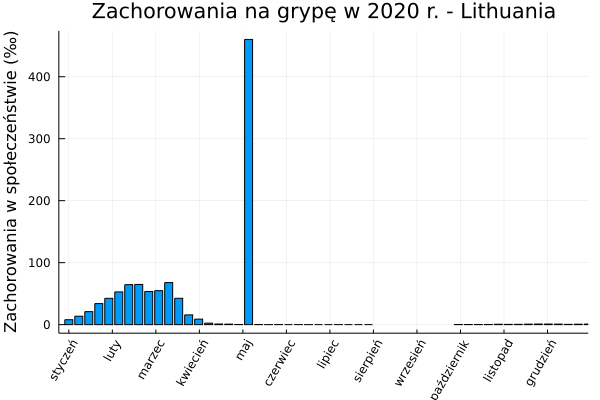

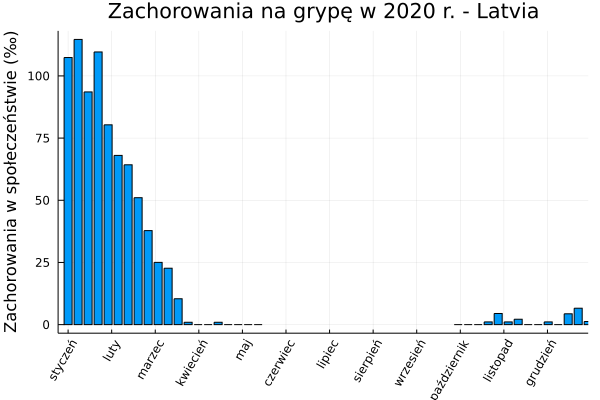

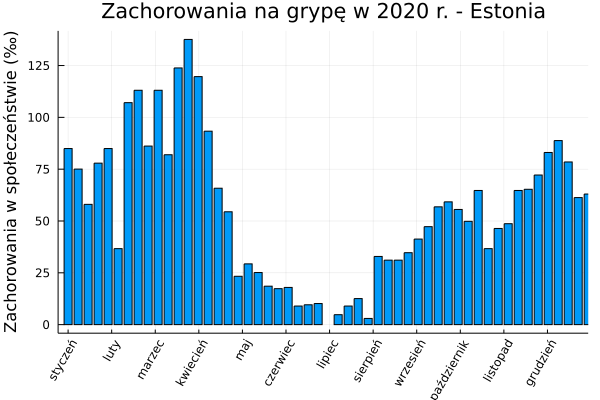

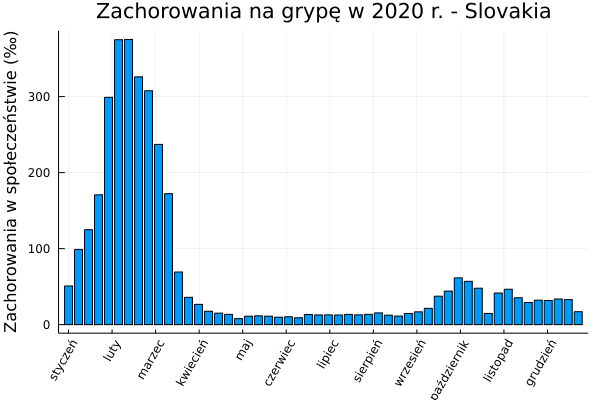

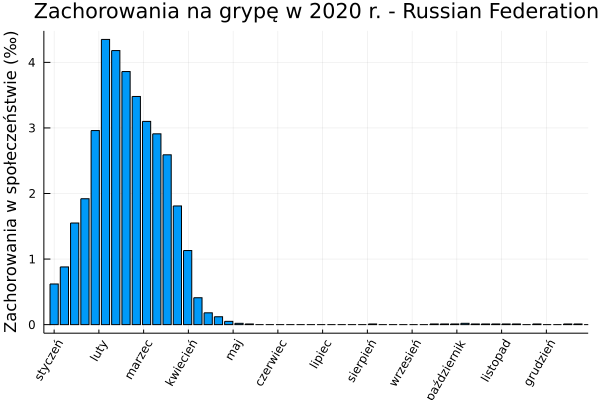

In [44]:
for (idx, country) in enumerate(country_list)
    plt = bar(plot_d_container[idx][1], plot_d_container[idx][2], xticks = (1:4.357:53, months), xlims = (0, 53), xrotation=60, 
        title = "Zachorowania na grypę w 2020 r. - $(@sprintf("%s", country))", 
        legend=false, ylabel = "Zachorowania w społeczeństwie (‰)")
    plt|>display
    
end

Porównanie danych niektórych państw na jednym wykresie.

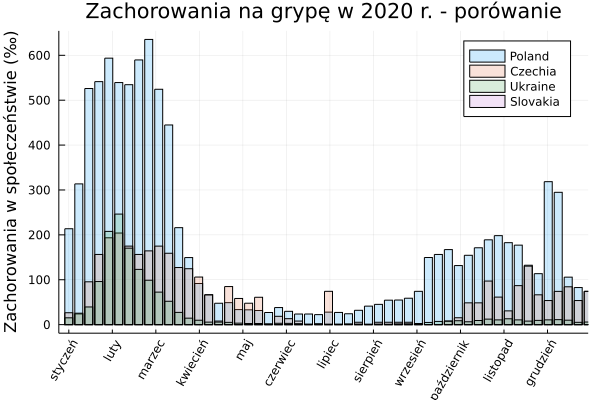

In [77]:
p = plot()
selected_n = [1, 3,2, 10]
labels = [country_list[i] for i in selected_n]
for (idx, country) in enumerate(selected_n)
    plt = bar!(p, plot_d_container[idx][1], plot_d_container[idx][2], xticks = (1:4.357:53, months), 
        xlims = (0, 53), xrotation=60, fillalpha=.2,label=labels[idx],
        title = "Zachorowania na grypę w 2020 r. - porówanie", 
        legend=true, ylabel = "Zachorowania w społeczeństwie (‰)")
   
    
end
p|>display

# ZADANIE 2

Przygotowanie charakterystki wiatru w czasie.

In [46]:
using DataFrames

In [47]:
time = 500
init_wind = (4, 6)
fluct = 1
randomgen(rg) = randn()*rg
winds = [init_wind[cord]+randn()*fluct for cord in 1:2, t in 1:time]
winds_next = hcat([0 0]', winds[:, 1:end-1])

2×500 Array{Float64,2}:
 0.0  3.29086  4.39046  3.42276  …  3.42078  4.80919  4.77187  5.89915
 0.0  6.25205  7.45436  5.51864     7.72996  7.01434  6.53462  6.65058

Przetwarzanie danych i tworzenie tabeli cech wiatru.

In [48]:
table_A = DataFrame(x = winds[1,:], y = winds[2,:], 
    v = .√(winds[1,:].^2 .+ winds[2,:].^2), θ = atan.(winds[2,:] ./ winds[1,:]),
    Δx = winds[1,:] .- winds_next[1,:], Δy = winds[2,:] .- winds_next[2,:])
table_B = DataFrame(Δv = .√(table_A.Δx.^2 .+ table_A.Δy.^2), Δθ = atan.(table_A.Δy ./ table_A.Δx))
wind_data = hcat(table_A, table_B)

,x,y,v,θ,Δx,Δy,Δv,Δθ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3.29086,6.25205,7.06526,1.08628,3.29086,6.25205,7.06526,1.08628
2,4.39046,7.45436,8.65122,1.03852,1.0996,1.2023,1.62931,0.829985
3,3.42276,5.51864,6.49389,1.01564,-0.9677,-1.93572,2.16413,1.10721
4,2.8541,4.98884,5.74756,1.05115,-0.568664,-0.529796,0.777215,0.750029
5,4.11947,6.37545,7.59054,0.997135,1.26537,1.38661,1.87719,0.831083
6,2.7352,6.91001,7.43166,1.19389,-1.38427,0.534563,1.4839,-0.368526
7,3.37386,6.32374,7.16746,1.08069,0.638663,-0.586276,0.866954,-0.742657
8,3.21672,6.16985,6.95805,1.09021,-0.157137,-0.153882,0.219936,0.774932
9,4.13979,6.68759,7.86522,1.0165,0.92307,0.517738,1.05835,0.511163


Analiza danych.

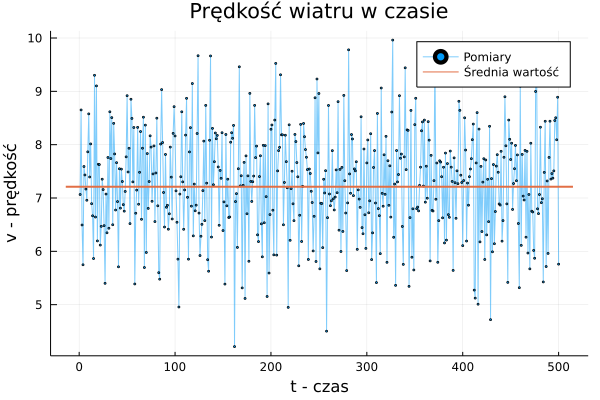

In [49]:
plot(wind_data.v, legend=false, marker=:circle, markersize = 1.2, linealpha = 0.5,
    title="Prędkość wiatru w czasie", xlabel="t - czas", ylabel="v - prędkość", label="Pomiary")
plot!(t->sqrt(init_wind[1]^2+init_wind[2]^2), lw=2, legend=true, label="Średnia wartość")

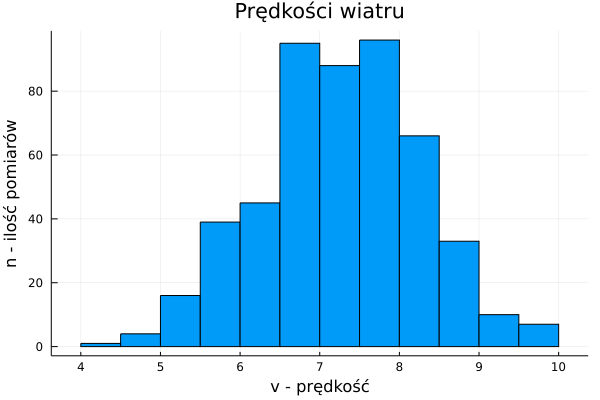

In [50]:
histogram(wind_data.v, nbins=20, legend=false, 
    title="Prędkości wiatru", xlabel="v - prędkość", ylabel="n - ilość pomiarów")

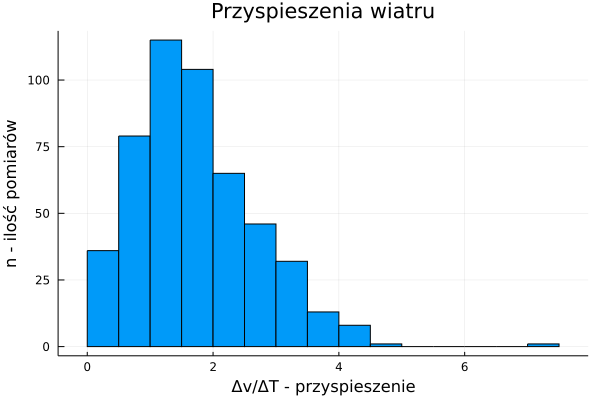

In [51]:
histogram(wind_data.Δv, nbins=20, legend=false, 
    title="Przyspieszenia wiatru", xlabel="Δv/ΔT - przyspieszenie", ylabel="n - ilość pomiarów")

Prezentacja zachowania wiatru.

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\wind.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\wind.gif")
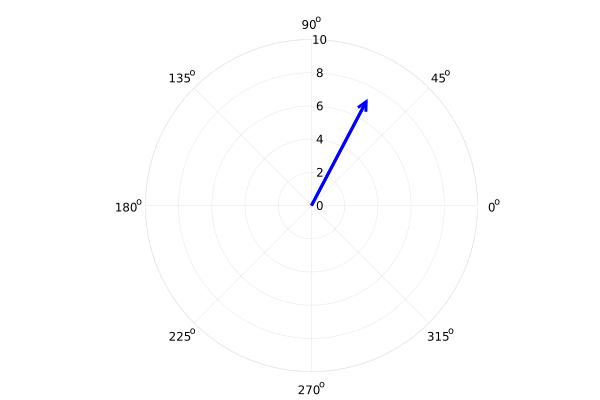

In [52]:
wnd = @animate for t in 1:time
    plot([0, wind_data.θ[t]],[0, wind_data.v[t]] , proj = :polar, linecolor = :blue,
        legend = :none, arrow=true, linewidth = 3, lims = (0.0, 10.0))
end
gif(wnd, "wind.gif", fps = 10)

# ZADANIE 3

Wczytanie danych z folderu.

In [1]:
using Plots
using JLD2
using Interact, WebIO
using StatsPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14661593688732357588\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6816538687190005357\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14661593688732357588\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
jldopen("harmOsc.jld2") do file
global oscValsA = file["a"]["xs"] 
global oscArgsA = file["a"]["ts"]
global oscValsB = file["b"]["xs"] 
global oscArgsB = file["b"]["ts"]
global oscValsC = file["c"]["xs"] 
global oscArgsC = file["c"]["ts"]
end
0

0

Rozwiązania dla poszczególnych podpunktów zadania. ( <b>c)</b> nie jest skończony )

<b>PRZYKŁAD A</b>

Mamy układ równań
$$
\left\{ \begin{array}{ll}
x(t) = A \sin(\omega t + \phi)\\
x'(t) = A\omega \cos (\omega t +\phi)\\
x''(t) = -A \omega^2 \sin (\omega t + \phi)
\end{array} \right. ,
$$

zatem aplikując do podanych zależności otrzymujemy

$$
\left\{ \begin{array}{ll}
x(0) = x_0 \implies x(0) = A \sin(\phi) = x_0\\
x'(0) = v_0 \implies x'(0) = A\omega \cos(\phi) = v_0\\
m x''(t) = -k x(t) \implies -A m \omega^2 \sin (\omega t + \phi) = -k A \sin(\omega t + \phi)
\end{array} \right. .
$$

Ostatnia równość ma zachodzić $\forall t$, więc można wnioskować:

$$\omega^2 m = k,$$

czyli 

<font color='navy'>$$\omega = \sqrt{\frac{k}{m}}\,.$$</font>


Dodatkowo z pierwszego i drugiego równania

$$ A = \frac{x_0}{\sin \phi} = \frac{v_0}{\omega \cos \phi}$$

$$\frac{\sin \phi}{\cos \phi} = \frac{\omega x_0}{v_0}$$

i po nałożeniu funkcji $\arctan$:

$$\phi = \arctan(\frac{\omega x_0}{v_0})$$

<font color='navy'>$$\phi = \arctan(\sqrt{\frac{k}{m}}\frac{x_0}{v_0})\,.$$</font>

Na koniec z pierwszego równania wyznaczamy amplitudę:

<font color='navy'>$$A = \frac{x_0}{\sin(\arctan(\sqrt{\frac{k}{m}}\frac{x_0}{v_0}))}\,.$$</font>

Uzależniliśmy $A$, $\phi$ i $\omega$ od parametrów $m$, $k$, $x_0$ oraz $v_0$, zatem możemy przejść do dopasowywania funkcji na wykresie.

In [3]:
m = 1
@manipulate for k=slider(label="k", LinRange(0,10,100), value=1.5),
                x₀=slider(label="x₀", LinRange(-2,2,50), value=0.2),
                v₀=slider(label="v₀", LinRange(-2,2,50), value=-1.2)
    
    ω = sqrt(k/m)
    Φ = atan(ω * x₀ / v₀)
    A = x₀ / sin(Φ)
    
    x_fitA(t) = A*sin(ω*t + Φ)
    
    plot(oscArgsA, oscValsA, label="Dane doświadczalne", ylims=(-1.5,1.5), xlabel = "t", ylabel = "x(t)")
    plot!(x_fitA, linewidth=1.5, label="Model", title="Ruch wahadła")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\cp\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\cp\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\cp\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\cp\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\cp\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000160a33d0, Task (runnable) @0x00000000160a33d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.10101\",\"0.20202\",\"0.30303\",\"0.40404\",\"0.505051\",\"0.606061\",\"0.707071\",\"0.808081\",\"0.909091\",\"1.0101\",\"1.11111\",\"1.21212\",\"1.31313\",\"1.41414\",\"1.51515\",\"1.61616\",

Manipulując wartościami parametrów  $x_0$, $k$, $v_0$, bo ($m$ jest znane) widzimy, że dla $\mathbf{k = 1.5}$, $\mathbf{x_0 = 0.2}$, $\mathbf{v_0=-1.2}$ zebrane dane pokrywają się z wygenerowanym wykresem.

Dodatkowo można pochylić się nad generowanymi błędami.

In [56]:
m = 1
k = 1.5
x₀ = 0.2
v₀ = -1.2

ω = sqrt(k/m)
Φ = atan(ω * x₀ / v₀)
A = x₀ / sin(Φ)

x_fitA(t) = A*sin(ω*t + Φ)
x_fitA_vals = [x_fitA(t) for t in oscArgsA]
0

0

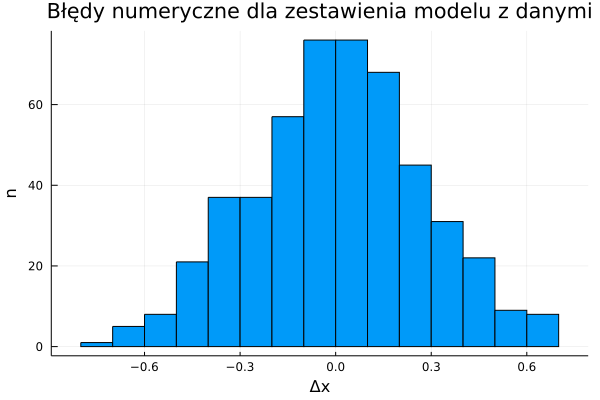

In [57]:
num_err_A = (x_fitA_vals .- oscValsA)
histogram(num_err_A, xlabel="Δx", ylabel="n", 
    title="Błędy numeryczne dla zestawienia modelu z danymi", legend=false, nbins=17)

<b>PRZYKŁAD B</b>

Tym razem układ równań wynikający z różniczkowania to

$$
\left\{ \begin{array}{ll}
x(t) = A \sin(\omega t + \phi)e^{-\lambda t}\\
x'(t) = A\omega \cos (\omega t +\phi)e^{-\lambda t} - A \lambda \sin (\omega t +\phi)e^{-\lambda t}\\
x''(t) = A(\lambda^2 - \omega^2) \sin (\omega t +\phi)e^{-\lambda t} - 2A \lambda\omega \cos (\omega t +\phi)e^{-\lambda t}
\end{array} \right. .
$$

Obliczenie pochodnych jest tu dłuższym procesem, jednak można pominąć jego rozpisywanie. Interesuje nas w tej sytuacji raczej ostateczny wynik.

Z zachodziących warunków natomias wnioskujemy

$$
\left\{ \begin{array}{ll}
x(0) = x_0 \implies x(0) = A \sin(\phi) \cdot 1 = x_0\\
x'(0) = v_0 \implies x'(0) = A\omega \cos(\phi) \cdot 1 - A \lambda \sin(\phi) \cdot 1 = v_0\\
m x''(t) = -k x(t) - \beta x'(t) \implies Ae^{-\lambda t}\sin (\omega t +\phi)(m(\omega^2-\lambda^2)+k-\beta\lambda) = Ae^{-\lambda t} = \cos(\omega t +\phi)(2m\lambda\omega-\beta\omega)
\end{array} \right. .
$$

Ostatnie równanie dzielimy przez niezerowe $Ae^{-\lambda t}$ i wiedząc, że zachodzi ono – oczywiście – dla wszystkich $t$ rozpatrujemy kolejno sytuacje, gdzie $\sin(\omega t + \phi)$ i $\cos(\omega t + \phi)$ będą równe $0$.

W pierwszym z przypadków (nie wiedząc wprawdzie jakie są wartości parametrów wewnątrz sin ale mając pewność, że w jakimś punkcie $t_0$ zachodzi taka sytuacja) mamy

$$
\cos(\omega t + \phi)(2m\lambda\omega-\beta\omega) = 0 \quad \forall t ,
$$

ale mając świadomość o wartościach przyjmowanych przez cosinusa, można równie dobrze napisać

$$
2m\lambda\omega = \beta\omega\quad/{:}\omega
$$

<font color='navy'>$$
\lambda = \frac{\beta}{2m} .
$$</font>

Analogicznie dla cosinusa (pomijając już pierwszy krok) otrzymujemy:

$$
m(\omega^2-\lambda^2)+k-\beta\lambda = 0 .
$$

Po podstawieniu wyznaczonej wcześniej $\lambda$:

$$
m(\omega^2-\frac{\beta^2}{4m^2})= -k-\frac{\beta^2}{2m}
$$

<font color='navy'>$$
\omega = \sqrt{\frac{\beta^2}{4m^3}-\frac{k}{m}+\frac{\beta^2}{2m^2}}\, .
$$</font>

Dodatkowo z pierwszego równania $A = \frac{x_0}{\sin\Phi}$, więc podstawiając do drugiego ($A \omega \cos \Phi - x_0 \lambda = v_0$) mamy

$$
\frac{\cos\Phi}{\sin\Phi}\omega x_0 - \lambda x_0  = v_0
$$

Po przekształceniu i nałożeniu funkcji odwrotnej dla uzyzkania $\Phi$ wyznaczamy

$$
\Phi = \arctan(\frac{\omega x_0}{v_0+\lambda x_0})
$$

<font color='navy'>$$
\Phi = \arctan(\frac{\sqrt{\frac{\beta^2}{4m^3}-\frac{k}{m}+\frac{\beta^2}{2m^2}} x_0}{v_0+\frac{\beta}{2m} x_0})
$$</font>

Ostatni parametr to więc już po prostu

<font color='navy'>$$
A = \frac{x_0}{\sin(\arctan(\frac{\sqrt{\frac{\beta^2}{4m^3}-\frac{k}{m}+\frac{\beta^2}{2m^2}} x_0}{v_0+\frac{\beta}{2m} x_0}))} .
$$</font>

Możemy dzięki temu przejść do dopasowywania modelu.

In [4]:
m = 1
@manipulate for k=slider(label="k", LinRange(0,10,100), value=0),
                x₀=slider(label="x₀", LinRange(-2,5, 100), value=2.03),
                v₀=slider(label="v₀", LinRange(-2,4,100), value=0.42),
                β=slider(label="β", LinRange(-2,4,100), value=1.09)
    
    ω = sqrt((β^2/4/m^3 -k/m + β^2/2/m^2)) # Complex only to eliminate errors
    λ = β/2/m
    Φ = atan(ω * x₀ / (v₀ + λ*x₀))
    A = x₀ / sin(Φ)
    
    x_fitB(t) = A*sin(ω*t + Φ)*exp(-λ*t)
    
    plot(oscArgsB, oscValsB, label="Dane doświadczalne", ylims=(-1.5,3), xlabel = "t", ylabel = "x(t)")
    plot!(x_fitB, linewidth=1.8, label="Model", title="Ruch wahadła")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\cp\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\cp\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\cp\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\cp\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\cp\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000029f1b6b0, Task (runnable) @0x0000000029f1b6b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.10101\",\"0.20202\",\"0.30303\",\"0.40404\",\"0.505051\",\"0.606061\",\"0.707071\",\"0.808081\",\"0.909091\",\"1.0101\",\"1.11111\",\"1.21212\",\"1.31313\",\"1.41414\",\"1.51515\",\"1.61616\",\

In [59]:
m = 1
k = 0
x₀ = 2.03
v₀ = 0.42
β = 1.09

ω = sqrt(β^2/4/m^3 -k/m + β^2/2/m^2)
λ = β/2/m
Φ = atan(ω * x₀ / (v₀ + λ*x₀))
A = x₀ / sin(Φ)

x_fitB(t) = A*sin(ω*t + Φ)*exp(-λ*t)
x_fitB_vals = [x_fitB(t) for t in oscArgsB]
0

0

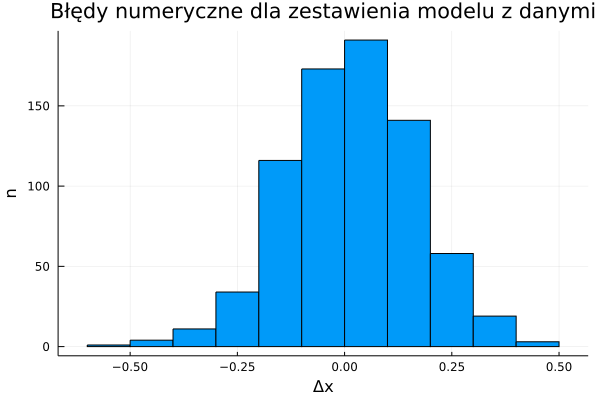

In [60]:
num_err_B = (x_fitB_vals .- oscValsB)
histogram(num_err_B, xlabel="Δx", ylabel="n",
    title="Błędy numeryczne dla zestawienia modelu z danymi", legend=false, nbins=17)

<b>PRZYKŁAD C</b>

Mamy układ równań
$$
\left\{ \begin{array}{ll}
x(t) = A \sin(\omega t + \phi)+A_2 \sin(\omega_2 t)\\
x'(t) = A\omega \cos (\omega t +\phi) + A_2\omega_2 \cos (\omega_2 t)\\
x''(t) = -A \omega^2 \sin (\omega t + \phi) + -A_2 \omega_2^2 \sin (\omega_2 t)
\end{array} \right. ,
$$

zatem aplikując do podanych zależności otrzymujemy

$$
\left\{ \begin{array}{ll}
x(0) = x_0 \implies x(0) = A \sin(\phi) = x_0\\
x'(0) = v_0 \implies x'(0) = A\omega \cos(\phi)+A_2 \omega_2 \cdot 1 = v_0\\
m x''(t) = -k x(t) + A_F \sin(\omega_F t) \implies \ldots
\end{array} \right. , \quad \textrm{gdzie  } A_F = 1,\omega_F = 2
$$

-----------------
<center>CIĄG DALSZY NASTĄPI...</center>

# Zadanie 4

Wczytanie danych.

In [1]:
using Plots, Printf, CSV, DataFrames
M=15
curves = DataFrame(CSV.File("curves.csv"))

,X,Y1,Y2,Y3
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.610662,-0.0385298
2,0.00200401,-0.152388,0.107566,0.0178157
3,0.00400802,-0.151032,0.492036,0.0633306
4,0.00601202,-0.224085,0.308604,0.00672577
5,0.00801603,0.0611868,0.698357,-0.0517846
6,0.01002,-0.140496,0.540339,-0.0344903
7,0.012024,-0.0603894,0.296563,-0.0630727
8,0.0140281,-0.100116,0.0436901,0.00492051
9,0.0160321,-0.0544421,0.640588,0.0160562


Zasada działania algorytmu.

<b>REGRESJA LINIOWA dla danego punktu $x_0$</b>
<ul>
  <li>Dla punktu $x_0$ zebrać $m$ punktów po lewej i tyle samo po prawej stronie tego punktu - łącznie $2m+1$.</li>
  <li>Wyznaczyć z argumentów tych punktów argument średni oraz wartość średnią:</li>
      
$$
\bar{x} = \frac{\sum_{i=1}^{2m+1}x_i}{2m+1},
$$ 
      
$$
\bar{y} = \frac{\sum_{i=1}^{2m+1}y_i}{2m+1}.
$$  
    
    
  <li>Znaleźć wzór $y=ax+b$ tak, że</li>
$$
a = \frac{\sum_{i=1}^{2m+1}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{2m+1}(x_i-\bar{x})^2},
$$ 
    
$$
b = \bar{y} - a\bar{x}.
$$
    
   <li>Wartość szukanej funkcji to teraz $f(x_0) = ax_0+b$ ze współczynnikami obliczonymi jak pokazano wyżej.</li>
   <li>Powtarzając procedurę dla każdego $x_0$ z określonym $m$ uzyskujemy przybliżenie funkcji. (W przypadkach brzegowych można zmniejszyć zakres na mniejszy niż $2m+1$, biorąc mniejszą liczbę punktów z danej strony. Należy wtedy oczywiście być konsekwentnym przy stosowaniu wzorów.) </li>
</ul>


Znajdowanie wartości funkcji w punkcie.

In [2]:
function eval(x_n, seriesX, seriesY, m)
    range = maximum([1, x_n-m]):minimum([length(seriesX), x_n+m])
    len_range = length(range)
    args_lst = [arg for arg in seriesX[range]]
    vals_lst = [val for val in seriesY[range]]
    x_mean = sum(args_lst)/len_range
    y_mean = sum(vals_lst)/len_range
    a = sum((args_lst .- x_mean) .* (vals_lst .- y_mean)) / sum((args_lst .- x_mean).^2)
    b = y_mean - a*x_mean
    return a*seriesX[x_n]+b
end

eval (generic function with 2 methods)

Szacowanie całej funkcji na przedziale i generowanie wykresów.

In [3]:
function funct_find(crv, number, mm=25)
    return [eval(n, curves.X, crv, mm) for n in 1:length(curves.X)]
end

funct_find (generic function with 2 methods)

In [4]:
function show_result(crv, number, mm=25)
    scatter(curves.X, crv, markersize = 2, label="Zebrane dane", 
    title="Algorytm regresji prostej - przykład $(@sprintf("%i", number))")
    regres = funct_find(crv, number, mm)
    plot!(curves.X, regres, lw = 3, label="Szacowanie") |>display
end

show_result (generic function with 2 methods)

Funkcje dla danych z pliku csv.

<b>PRZYKŁAD 1</b>

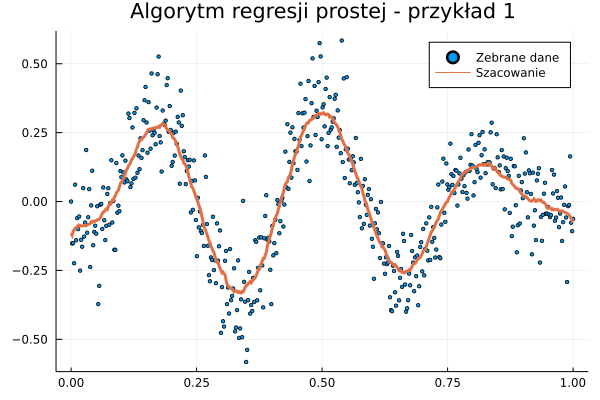

In [21]:
show_result(curves.Y1, 1, 20)

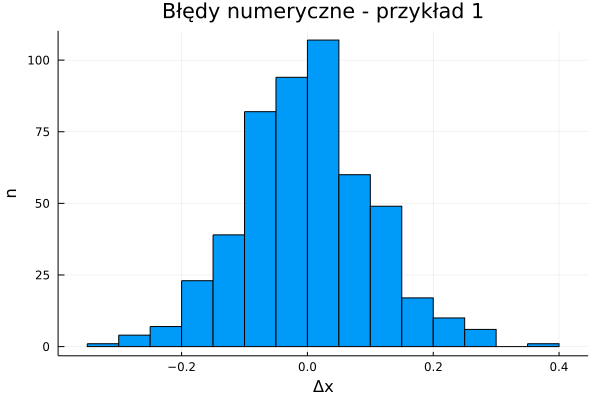

In [6]:
num_err_R1 = (curves.Y1 .- funct_find(curves.Y1, 1))
histogram(num_err_R1, xlabel="Δx", ylabel="n",
    title="Błędy numeryczne - przykład 1", legend=false, nbins=17)

<b>PRZYKŁAD 2</b>

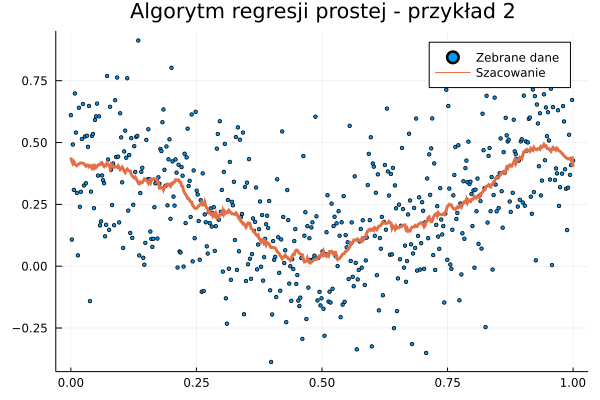

In [25]:
show_result(curves.Y2, 2, 20)

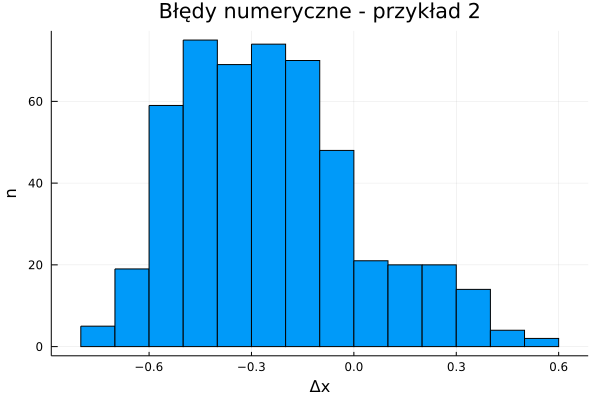

In [24]:
num_err_R2 = (curves.Y1 .- funct_find(curves.Y2, 2, 20))
histogram(num_err_R2, xlabel="Δx", ylabel="n",
    title="Błędy numeryczne - przykład 2", legend=false, nbins=17)

<b>PRZYKŁAD 3</b>

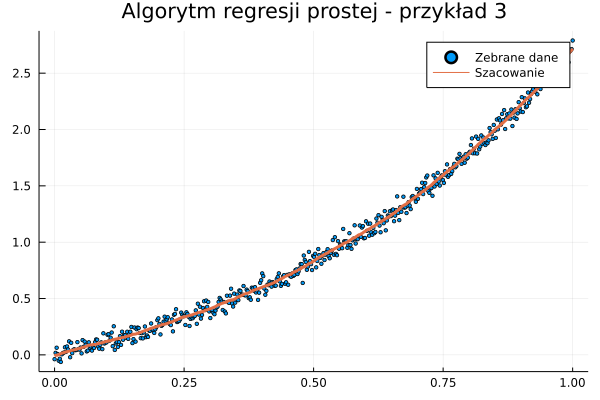

In [9]:
show_result(curves.Y3, 3)

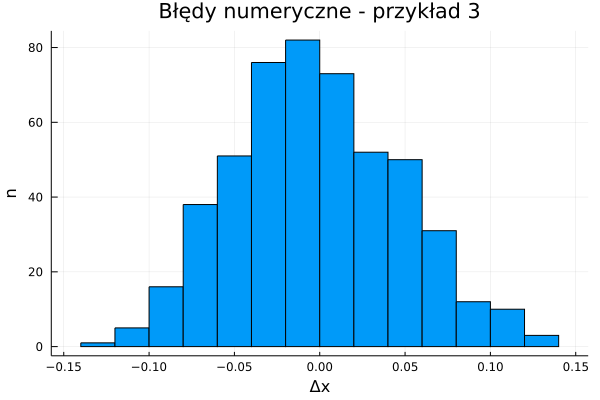

In [10]:
num_err_R3 = (curves.Y3 .- funct_find(curves.Y3, 1))
histogram(num_err_R3, xlabel="Δx", ylabel="n",
    title="Błędy numeryczne - przykład 3", legend=false, nbins=17)

KONIEC listy 6.